In [112]:
import seaborn as sns

In [113]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('data.csv')
dataset

,Matrix,Matrix %,Size1,RNF1 %,Size2,RNF2%,stiring time,stir speed mixing,temperature,Tensile Strength,BHN
0,AL7075,98.0,38.0,2.0,0.0,0.0,NaN,250,720.0,230.0,80.0
1,AL7075,96.0,38.0,4.0,0.0,0.0,NaN,250,720.0,240.0,95.0
2,AL7075,94.0,38.0,6.0,0.0,0.0,NaN,250,720.0,270.0,120.0
3,AL7075,92.0,38.0,8.0,0.0,0.0,NaN,250,720.0,245.0,110.0
4,AL7075,100.0,37.0,0.0,0.0,0.0,10,50,718.0,122.8,62.2
...,...,...,...,...,...,...,...,...,...,...,...
228,AL6061,96.0,5.0,0.0,15.0,4.0,8,500,720.0,85.0,55.0
229,AL6061,95.0,5.0,1.0,15.0,4.0,8,500,720.0,125.0,64.0
230,AL6061,94.0,5.0,2.0,15.0,4.0,8,500,720.0,145.0,67.0
231,AL6061,93.0,5.0,3.0,15.0,4.0,8,500,720.0,165.0,76.0


## Import Libraries and loading data

In [114]:
dataset.isnull().sum()

Matrix                0
Matrix %              0
Size1                29
RNF1 %                0
Size2                13
RNF2%                 0
stiring time         43
stir speed mixing    38
temperature          30
Tensile Strength      9
BHN                  22
dtype: int64

In [115]:
dataset.nunique()

Matrix                 2
Matrix %              23
Size1                 36
RNF1 %                21
Size2                 20
RNF2%                 16
stiring time          16
stir speed mixing     15
temperature           18
Tensile Strength     167
BHN                  130
dtype: int64

## Filling Null Values

In [116]:
dataset['stiring time'].fillna(dataset['stiring time'].mode()[0],inplace=True)
dataset['temperature'].fillna(dataset['temperature'].mode()[0],inplace=True)
dataset['Tensile Strength'].fillna(dataset['Tensile Strength'].mode()[0],inplace=True)
dataset['stir speed mixing'].fillna(dataset['stir speed mixing'].mode()[0],inplace=True)
dataset['Size1'].fillna(dataset["Size1"].mode()[0],inplace=True)
dataset['RNF2%'].fillna(0,inplace=True)
dataset['Size2'].fillna(0,inplace=True)
dataset['BHN'].fillna(dataset['BHN'].mean(),inplace=True)

## Replacing STAR and Alloy Name with Integer

In [117]:
dataset['stiring time'].replace("*",dataset['stiring time'].mode()[0],inplace=True)
dataset['stir speed mixing'].replace("*",dataset['stir speed mixing'].mode()[0],inplace=True)

In [118]:
dataset.shape

(233, 11)

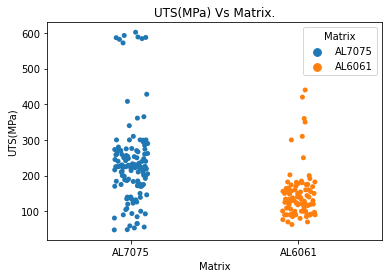

In [119]:
sns.stripplot(y='Tensile Strength',x='Matrix',data=dataset,hue='Matrix');
import matplotlib.pyplot as plt
plt.title("UTS(MPa) Vs Matrix.")
plt.ylabel('UTS(MPa)')
plt.show()

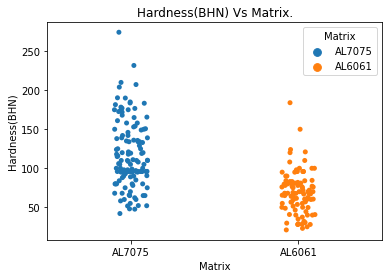

In [120]:
import matplotlib.pyplot as plt
sns.stripplot(y='BHN',x='Matrix',data=dataset,hue='Matrix');
plt.title("Hardness(BHN) Vs Matrix.")
plt.ylabel('Hardness(BHN)')
plt.show()


In [121]:
dataset['Matrix'].replace(["AL7075","AL6061"],[1,2],inplace=True)

## Changing the datatype into float type

In [122]:
dataset['stiring time'] = dataset['stiring time'].astype(np.float64)
dataset['Matrix'] = dataset['Matrix'].astype(np.float64)
dataset['stir speed mixing'] = dataset['stir speed mixing'].astype(np.float64)

## Checking the Data Info

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Matrix             233 non-null    float64
 1   Matrix %           233 non-null    float64
 2   Size1              233 non-null    float64
 3   RNF1 %             233 non-null    float64
 4   Size2              233 non-null    float64
 5   RNF2%              233 non-null    float64
 6   stiring time       233 non-null    float64
 7   stir speed mixing  233 non-null    float64
 8   temperature        233 non-null    float64
 9   Tensile Strength   233 non-null    float64
 10  BHN                233 non-null    float64
dtypes: float64(11)
memory usage: 20.1 KB


In [124]:
dataset.describe()

,Matrix,Matrix %,Size1,RNF1 %,Size2,RNF2%,stiring time,stir speed mixing,temperature,Tensile Strength,BHN
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,1.433476,93.980687,33.757682,3.987124,19.353219,1.603004,11.012876,449.463519,748.738197,194.106223,95.834834
std,0.496622,7.640964,33.973626,3.661873,30.842042,2.544456,6.103617,134.618041,72.906501,106.788944,43.629019
min,1.000000,0.000000,0.040000,0.000000,0.000000,0.000000,3.000000,50.000000,500.000000,47.650000,21.000000
25%,1.000000,91.000000,10.000000,1.000000,0.000000,0.000000,8.000000,400.000000,718.000000,122.000000,65.500000
50%,1.000000,95.000000,37.000000,3.000000,0.000000,0.000000,10.000000,500.000000,720.000000,175.000000,93.000000
75%,2.000000,98.000000,40.000000,6.000000,40.000000,3.000000,10.000000,500.000000,800.000000,240.000000,118.000000
max,2.000000,100.000000,165.000000,20.000000,190.000000,12.000000,40.000000,750.000000,950.000000,601.900000,274.310000


In [125]:
# from scipy import stats
# t = 3
# outliers = []
# for feature in dataset.columns:
#     z_score = np.abs(stats.zscore(dataset[feature]))
#     inx = np.where(z_score>t)
#     print(inx)
#     outliers.extend(inx[0])
# dataset = dataset.drop(outliers)

In [126]:
dataset.isnull().sum()

Matrix               0
Matrix %             0
Size1                0
RNF1 %               0
Size2                0
RNF2%                0
stiring time         0
stir speed mixing    0
temperature          0
Tensile Strength     0
BHN                  0
dtype: int64

## Viewing the filtered dataset

In [127]:
dataset.head(5)

,Matrix,Matrix %,Size1,RNF1 %,Size2,RNF2%,stiring time,stir speed mixing,temperature,Tensile Strength,BHN
0,1.0,98.0,38.0,2.0,0.0,0.0,10.0,250.0,720.0,230.0,80.0
1,1.0,96.0,38.0,4.0,0.0,0.0,10.0,250.0,720.0,240.0,95.0
2,1.0,94.0,38.0,6.0,0.0,0.0,10.0,250.0,720.0,270.0,120.0
3,1.0,92.0,38.0,8.0,0.0,0.0,10.0,250.0,720.0,245.0,110.0
4,1.0,100.0,37.0,0.0,0.0,0.0,10.0,50.0,718.0,122.8,62.2


# -------> First predicting the Tensile Strength(Mpa) <-------

In [128]:
feature1 = dataset.iloc[:,:9]
label1 = dataset.iloc[:,9]

In [129]:
feature1.shape,label1.shape

((233, 9), (233,))

### Splitting into Train and Test Part

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature1,label1,test_size=0.3,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((163, 9), (70, 9), (163,), (70,))

### Model Building using ML Models :

#### ExtraTreesRegressor

Mean Absolute Error :  25.70034200680263
Explained Variance Score :  0.9077906434639348
R2 :  0.9065171680916261
max error  :  102.50223809523683
RMSE :  36.076171852399526


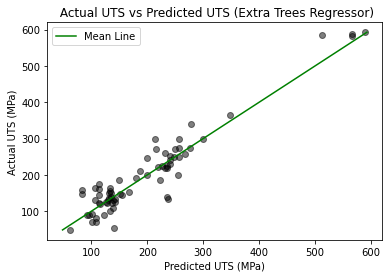

<Figure size 1152x1152 with 0 Axes>

In [131]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score,max_error
from math import sqrt
model0 = ExtraTreesRegressor(n_estimators=420,random_state=0)
model0.fit(X_train,y_train)
y_pred = model0.predict(X_test)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))


import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g', label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual UTS vs Predicted UTS (Extra Trees Regressor)')
plt.xlabel('Predicted UTS (MPa)')
plt.ylabel('Actual UTS (MPa)')
plt.figure(figsize=(16,16)) 
plt.show()

In [132]:
values = pd.DataFrame()
values['Actual'] = y_test.copy()
values = values.reset_index()
values.drop(['index'],axis=1,inplace=True)

values['Predicted'] = y_pred.copy()
values.head(5)

,Actual,Predicted
0,220.00,232.488095
1,92.14,100.828381
2,165.00,105.535726
3,225.00,235.498429
4,153.90,168.054571


#### Random Forest Regressor

Mean Absolute Error :  33.86920380952383
Explained Variance Score :  0.8303378840969863
R2 :  0.8281321567066626
max error  :  148.84645000000052
RMSE :  48.916100723621966


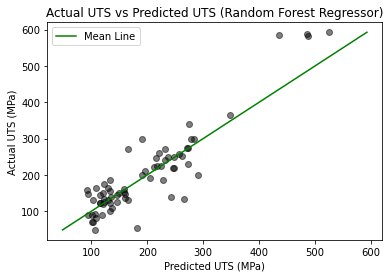

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score,max_error
from math import sqrt

model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.title('Actual UTS vs Predicted UTS (Random Forest Regressor)')
plt.legend(loc="upper left")
plt.xlabel('Predicted UTS (MPa)')
plt.ylabel('Actual UTS (MPa)')
plt.show()

#### Gradient Boosting Regressor

Mean Absolute Error :  35.311169044275175
Explained Variance Score :  0.8454837729791148
R2 :  0.8383313663026954
max error  :  142.83426211915906
RMSE :  47.44248194452482


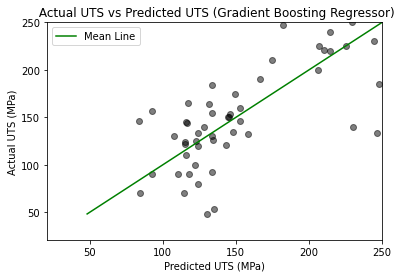

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt

model2 = GradientBoostingRegressor()
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.title(' Actual UTS vs Predicted UTS (Gradient Boosting Regressor)')
plt.ylim(top=250)
plt.legend(loc="upper left")
plt.xlim(right=250)
plt.xlabel('Predicted UTS (MPa)')
plt.ylabel('Actual UTS (MPa)')
plt.show()

#### Bagging Regressor

Mean Absolute Error :  35.183235714285715
Explained Variance Score :  0.8050395755347374
R2 :  0.8009754230297206
max error  :  174.34500000000008
RMSE :  52.6390292687239


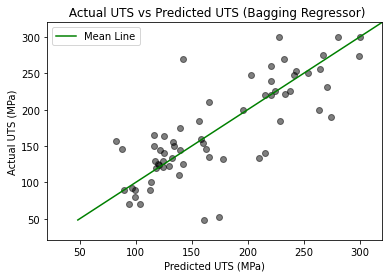

In [135]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt

model3 = BaggingRegressor()
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)

print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))

import matplotlib.pyplot as plt

line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.title(' Actual UTS vs Predicted UTS (Bagging Regressor)')
plt.ylim(top=320)
plt.xlim(right=320)
plt.legend(loc="upper left")

plt.xlabel('Predicted UTS (MPa)')
plt.ylabel('Actual UTS (MPa)')
plt.show()

#### AdaBoost Regressor

Mean Absolute Error :  44.200279776598485
Explained Variance Score :  0.7787290204856092
R2 :  0.7774555468356107
max error  :  145.72404761904758
RMSE :  55.66252510944309


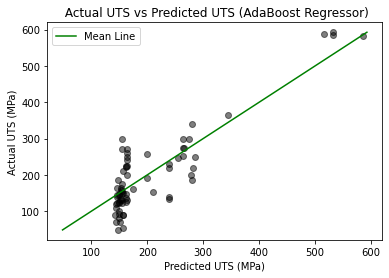

In [136]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt

model4 = AdaBoostRegressor()
model4.fit(X_train,y_train)

y_pred = model4.predict(X_test)

print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual UTS vs Predicted UTS (AdaBoost Regressor)')
plt.xlabel('Predicted UTS (MPa)')
plt.ylabel('Actual UTS (MPa)')
plt.show()

#### Decision Tree Regressor

Mean Absolute Error :  38.119499999999995
Explained Variance Score :  0.6897179368918593
R2 :  0.6863118789472666
max error  :  418.29999999999995
RMSE :  66.08510029013456


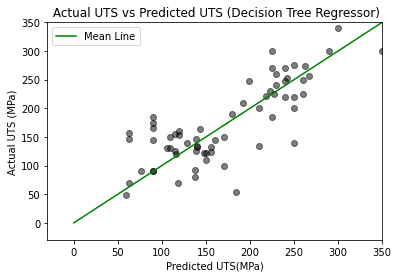

In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model5 = DecisionTreeRegressor()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))


import matplotlib.pyplot as plt
line_s,line_e = 0,350
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.title(' Actual UTS vs Predicted UTS (Decision Tree Regressor)')
plt.legend(loc="upper left")
plt.ylim(top=350)
plt.xlim(right=350)
plt.xlabel('Predicted UTS(MPa)')
plt.ylabel('Actual UTS (MPa)')
plt.show()

##### XGBRegressor

Mean Absolute Error :  29.305693019321982
Explained Variance Score :  0.8810713176330804
R2 :  0.8747891849001268
max error  :  129.74937438964844
RMSE :  41.75182257910678


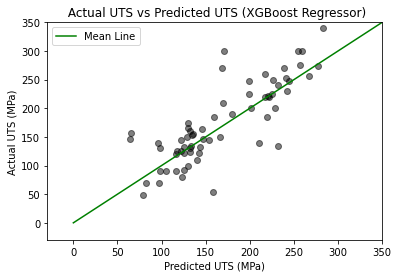

In [138]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model6 = XGBRegressor()
model6.fit(X_train,y_train)
y_pred = model6.predict(X_test)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))

import matplotlib.pyplot as plt
line_s,line_e = 0,350
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual UTS vs Predicted UTS (XGBoost Regressor)')
plt.ylim(top=350)
plt.xlim(right=350)
plt.xlabel('Predicted UTS (MPa)')
plt.ylabel('Actual UTS (MPa)')
plt.show()


##### catboost

Mean Absolute Error :  33.04541856831928
Explained Variance Score :  0.8619432755679578
R2 :  0.8560982175191048
max error  :  152.14644309766828
RMSE :  44.75974500782909


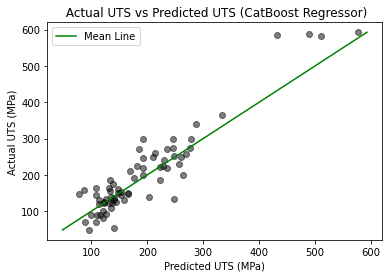

In [139]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model7 = CatBoostRegressor(verbose=0)
model7.fit(X_train,y_train)
y_pred = model7.predict(X_test)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual UTS vs Predicted UTS (CatBoost Regressor)')
plt.xlabel('Predicted UTS (MPa)')
plt.ylabel('Actual UTS (MPa)')
plt.show()


## Hyper Parameter Tuning

In [140]:
# from sklearn.model_selection import GridSearchCV
# model = ExtraTreesRegressor()
# grid = {'n_estimators':[120,130,140,150],
#         'criterion' : ["squared_error", "absolute_error"],
#         'min_samples_split':[2,3,4,5]}
# g_model = GridSearchCV(model,param_grid=grid,cv=5)
# g_model.fit(X_train,y_train)
# print(g_model.best_params_)
# print()
# print(g_model.best_estimator_)

### Out of all the model Bagging Regressor performed well then we will use Bagging Model for testing

### Save the Bagging model

In [141]:
import pickle
pickle.dump(model0,open('model_TS.pkl','wb'))

### Save the filtered data

In [142]:
dataset.to_csv('filtered_data.csv',index=False)

# -------> Now predicting the BHN <-------

In [143]:
feature2 = dataset.iloc[:,:9]
label2 = dataset.iloc[:,10]

feature2.shape,label2.shape

((233, 9), (233,))

### Splitting into Train and Test Part

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature2,label2,test_size=0.1,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 9), (24, 9), (209,), (24,))

In [145]:
# ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model6 = ExtraTreesRegressor(random_state=0)
model6.fit(X_train,y_train)
y_pred = model6.predict(X_test)
print('ExtraTreesRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))
print()

values = pd.DataFrame()
values['Actual'] = y_test.copy()
values = values.reset_index()
values.drop(['index'],axis=1,inplace=True)

values['Predicted'] = y_pred.copy()
values.head(25)


ExtraTreesRegressor:
Mean Absolute Error :  11.367981852290669
Explained Variance Score :  0.8108267005634292
R2 :  0.8107271676528371
max error  :  36.425000000000004
RMSE :  14.625586351173308



,Actual,Predicted
0,154.00,152.563300
1,40.76,77.185000
2,76.00,65.600000
3,120.00,101.623664
4,51.41,44.211200
5,89.00,103.139900
6,85.00,108.975000
7,60.00,75.771000
8,90.00,96.036697
9,96.00,98.136697


### Model Building using ML Models :

ExtraTreesRegressor:
Mean Absolute Error :  11.367981852290669
Explained Variance Score :  0.8108267005634292
R2 :  0.8107271676528371
max error  :  36.425000000000004
RMSE :  14.625586351173308



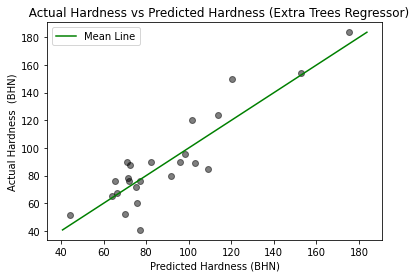

RandomForestRegressor:
Mean Absolute Error :  12.109539139020521
Explained Variance Score :  0.7764781997107405
R2 :  0.7757396308812325
max error  :  38.79919620853069
RMSE :  15.92008609574958



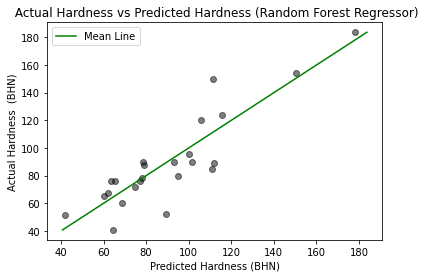

GradientBoostingRegressor:
Mean Absolute Error :  7.397183073416631
Explained Variance Score :  0.9226879963378363
R2 :  0.9217761100271612
max error  :  19.65000529247186
RMSE :  9.402402752443177



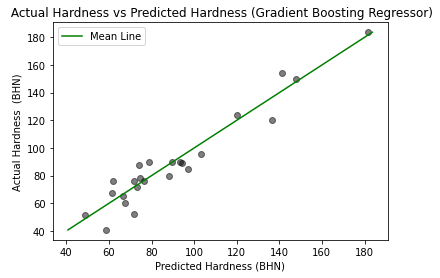

BaggingRegressor:
Mean Absolute Error :  12.862629146919431
Explained Variance Score :  0.767825377727204
R2 :  0.7647276529064757
max error  :  33.75
RMSE :  16.306268466727822



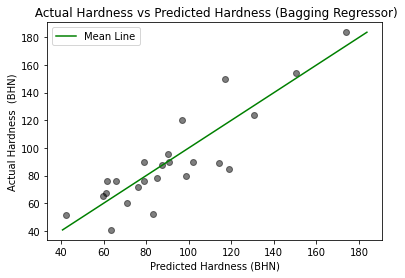

AdaBoostRegressor:
Mean Absolute Error :  21.556005841378852
Explained Variance Score :  0.40883107738777313
R2 :  0.365352442824062
max error  :  79.74572701421798
RMSE :  26.78153419103302



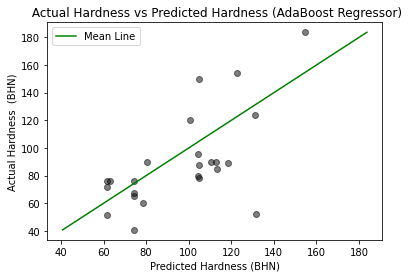

DecisionTreeRegressor:
Mean Absolute Error :  13.657298578199052
Explained Variance Score :  0.6182837711623174
R2 :  0.6177763550168668
max error  :  62.0
RMSE :  20.78394194399898



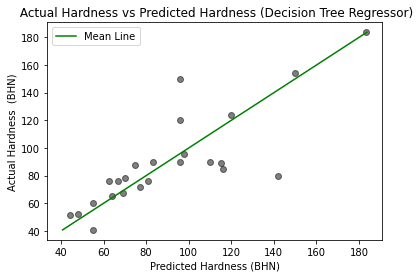


XGBRegressor:
Mean Absolute Error :  10.617339655558267
Explained Variance Score :  0.8000804867542378
R2 :  0.7993451993168943
max error  :  42.200775146484375
RMSE :  15.058923363092552


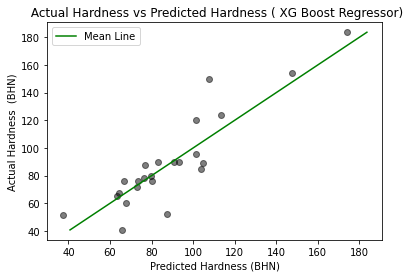


CatBoostRegressor:
Mean Absolute Error :  10.80697613925905
Explained Variance Score :  0.822390687756769
R2 :  0.8213331380895607
max error  :  30.63980040946609
RMSE :  14.209904216723666


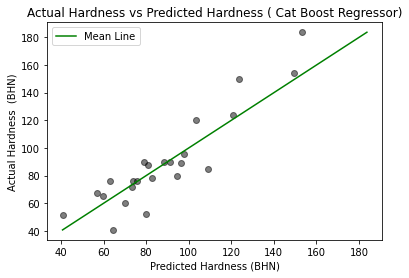

In [148]:
# ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model6 = ExtraTreesRegressor(random_state=0)
model6.fit(X_train,y_train)
y_pred = model6.predict(X_test)
print('ExtraTreesRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))
print()

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title('  Actual Hardness vs Predicted Hardness (Extra Trees Regressor)')
plt.xlabel('Predicted Hardness (BHN)')
plt.ylabel('Actual Hardness  (BHN)')
plt.show()


## RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model1 = RandomForestRegressor(random_state=0)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print('RandomForestRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))
print()

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual Hardness vs Predicted Hardness (Random Forest Regressor)')
plt.xlabel('Predicted Hardness (BHN)')
plt.ylabel('Actual Hardness  (BHN)')
plt.show()


##GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model2 = GradientBoostingRegressor(n_estimators=445)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print('GradientBoostingRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))
print()

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual Hardness vs Predicted Hardness (Gradient Boosting Regressor)')
plt.xlabel('Predicted Hardness (BHN)')
plt.ylabel('Actual Hardness  (BHN)')
plt.show()


##BaggingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model3 = BaggingRegressor(random_state=0)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print('BaggingRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))
print()

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual Hardness vs Predicted Hardness (Bagging Regressor)')
plt.xlabel('Predicted Hardness (BHN)')
plt.ylabel('Actual Hardness  (BHN)')
plt.show()


##AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model4 = AdaBoostRegressor(random_state=0)
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
print('AdaBoostRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))
print()

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual Hardness vs Predicted Hardness (AdaBoost Regressor)')
plt.xlabel('Predicted Hardness (BHN)')
plt.ylabel('Actual Hardness  (BHN)')
plt.show()



##DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model5 = DecisionTreeRegressor(random_state=0)
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print('DecisionTreeRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))
print()

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual Hardness vs Predicted Hardness (Decision Tree Regressor)')
plt.xlabel('Predicted Hardness (BHN)')
plt.ylabel('Actual Hardness  (BHN)')

plt.show()



from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model6 = XGBRegressor()
model6.fit(X_train,y_train)
y_pred = model6.predict(X_test)
print('\nXGBRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))

import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title(' Actual Hardness vs Predicted Hardness ( XG Boost Regressor)')
plt.xlabel('Predicted Hardness (BHN)')
plt.ylabel('Actual Hardness  (BHN)')
plt.show()


from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error
from math import sqrt
model7 = CatBoostRegressor(verbose=0)
model7.fit(X_train,y_train)
y_pred = model7.predict(X_test)
print('\nCatBoostRegressor:')
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Explained Variance Score : ",explained_variance_score(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))
print("max error  : ",max_error(y_test,y_pred))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))


import matplotlib.pyplot as plt
line_s,line_e = y_test.min(),y_test.max()
plt.scatter(y_pred, y_test,color='k',alpha=0.5)
plt.plot([line_s,line_e],[line_s,line_e],color='g',label="Mean Line")
plt.legend(loc="upper left")
plt.title('Actual Hardness vs Predicted Hardness ( Cat Boost Regressor)')
plt.xlabel('Predicted Hardness (BHN)')
plt.ylabel('Actual Hardness  (BHN)')

plt.show()



#### AdaBoost performed best in this case so will take it for testing
save the model

In [147]:
import pickle
pickle.dump(model2,open('model_BHN.pkl','wb'))